### Student Information
Name:   宋昭佑(SUNG CHAO YOU)

Student ID: R13631055

GitHub ID:  zzz318418

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [4]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zzz31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [6]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

c:\Users\zzz31\Desktop\BIME\114-1\DataMining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [7]:
### Begin Assignment Here
import pandas as pd

# 載入 Reddit-stock-sentiment.csv 檔案
df = pd.read_csv("Reddit-stock-sentiment.csv")

# 只選擇 'text' 和 'label' 欄位
df_simplified = df[['text', 'label']]

# 顯示前五筆資料
print(df_simplified.head(5))


                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0
2                  Seeing lots of red in the ticker.    0.0
3  Vision Marine Technologies Inc. is rewriting t...    1.0
4                           He didn’t say thank you.   -1.0


In [8]:
# 使用 Pandas 的 iloc 來選擇前兩行文本
df_simplified.iloc[0:2]['text']


0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
Name: text, dtype: object

In [9]:
df_simplified.text

0                                       Calls on retards
1      Stunt as in like why did they even make a big ...
2                      Seeing lots of red in the ticker.
3      Vision Marine Technologies Inc. is rewriting t...
4                               He didn’t say thank you.
                             ...                        
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\n\n [Stock Analyst Recomm...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, Length: 847, dtype: object

In [10]:
len(df_simplified)

847

In [11]:
len(df_simplified.text)

847

In [12]:
len(df_simplified.label)

847

In [13]:
df_simplified.text[0]

'Calls on retards'

In [14]:
df_simplified.text[0:10]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

In [15]:
# 先定義標籤對應的情感名稱
label_names = {1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'}

# 遍歷前 10 條資料，打印其情感標籤名稱
for label in df_simplified['label'][:10]:
    print(label_names[label])


Negative
Neutral
Neutral
Positive
Negative
Neutral
Negative
Neutral
Positive
Positive


In [16]:
# 遍歷前 3 條資料
for i in range(3):
    print(f"ex{i+1}:")
    # 將 text 欄位中的文本按行分割並打印
    print("\n".join(df_simplified['text'][i].split("\n")))

ex1:
Calls on retards
ex2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
ex3:
Seeing lots of red in the ticker.


In [17]:
# 先定義標籤對應的情感名稱
label_names = {1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'}

# 使用 .apply() 方法遍歷 df_simplified['label'] 欄位並轉換為情感標籤名稱
df_simplified['label_mean'] = df_simplified['label'].apply(lambda x: label_names.get(x, 'Unknown'))



C:\Users\zzz31\AppData\Local\Temp\ipykernel_66204\2465695234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['label_mean'] = df_simplified['label'].apply(lambda x: label_names.get(x, 'Unknown'))


In [18]:
df_simplified[0:10]

,text,label,label_mean
0,Calls on retards,-1.0,Negative
1,Stunt as in like why did they even make a big ...,0.0,Neutral
2,Seeing lots of red in the ticker.,0.0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
4,He didn’t say thank you.,-1.0,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,Neutral
6,Trump will respond to china increasing their t...,-1.0,Negative
7,Confirmed not a trap. Its been like this for p...,0.0,Neutral
8,Am I the only one seeing the cup & handle brea...,1.0,Positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,Positive


In [19]:
# 使用 .iloc() 或 .head() 來選取前 10 條資料，並選擇 'text' 和 'category_name' 欄位
df_simplified.iloc[:10][['text', 'label_mean']]


,text,label_mean
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Neutral
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",Neutral
6,Trump will respond to china increasing their t...,Negative
7,Confirmed not a trap. Its been like this for p...,Neutral
8,Am I the only one seeing the cup & handle brea...,Positive
9,HLGN is $10. Hurry and catch it now before it ...,Positive


In [20]:
df_simplified.iloc[-10:]

,text,label,label_mean
837,Finance media lying \n\n*Surprise*,-1.0,Negative
838,I am all in,0.0,Neutral
839,The Art of the Deal…,0.0,Neutral
840,Lol fr,0.0,Neutral
841,So countries “begging to stop the tariffs” and...,1.0,Positive
842,Invest now it is going to shoot up tomorrow,1.0,Positive
843,Where can I read this?,0.0,Neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,Neutral
845,i sold my puts so i expect cheeto to declare w...,-1.0,Negative
846,![img](emote|t5_2th52|31224),0.0,Neutral


In [21]:
df_simplified.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [22]:
print(df_simplified.loc[:10, 'text'])

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object


In [23]:
df_simplified.iloc[:10, 0]


0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

In [24]:
# 假設 df_simplified 中已經有 'category' 欄位
result = df_simplified.query('label == 1.0')
result

,text,label,label_mean
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
8,Am I the only one seeing the cup & handle brea...,1.0,Positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,Positive
34,So they went from saying redditors are bad for...,1.0,Positive
38,"Hey our net worth match now, we can be friends!",1.0,Positive
...,...,...,...
830,powell already said inflations from tariffs is...,1.0,Positive
831,Things will get better soon. Once those 9 tran...,1.0,Positive
832,NICE. Cannot complain.,1.0,Positive
841,So countries “begging to stop the tariffs” and...,1.0,Positive


In [25]:
df_simplified[df_simplified['label_mean'] == 'Positive'][::10][0:5]

,text,label,label_mean
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
78,I think it’s gonna work itself out. I bought t...,1.0,Positive
168,The obvious can also be refreshing from CNBC: ...,1.0,Positive
219,Same. Back to break even after that last rip b...,1.0,Positive
319,Etrade has a feed of news articles about how r...,1.0,Positive


In [26]:
# check missing values
df_simplified.isnull()

,text,label,label_mean
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [27]:
# my functions
import helpers.data_mining_helpers as dmh
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [28]:
# Answer here
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [29]:
dummy_series = pd.Series(["dummy_record", 1.0], index=["text", "label"])

In [30]:
dummy_series

text     dummy_record
label             1.0
dtype: object

In [31]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,label
0,dummy_record,1.0


In [32]:
result_with_series = pd.concat([df_simplified, dummy_series.to_frame().T], ignore_index=True)

In [33]:
# check if the records was commited into result
len(result_with_series)

848

In [34]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [35]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'label': 1.0
              }]

In [36]:
df_simplified = pd.concat([df_simplified, pd.DataFrame(dummy_dict)], ignore_index=True)

In [37]:
len(df_simplified)

848

In [38]:
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [39]:
df_simplified.dropna(inplace=True)

In [40]:
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [41]:
len(df_simplified)

847

In [42]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [43]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

第 0 列（A）：float（np.nan 屬於 float 型別）

第 1 列（B）：float（缺欄位會自動補 NaN，屬於 float 型別）

第 2 列（C）：str（'NaN' 是字串）

第 3 列（D）：str（'None' 是字串）

第 4 列（E）：float（Python 的 None 會被 pandas 當成 NaN，屬於 float 型別）

第 5 列（F）：str（空字串 '' 是字串）


In [44]:
df_simplified.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [45]:
sum(df_simplified.duplicated())

23

In [46]:
sum(df_simplified.duplicated('text'))

23

In [47]:
df_simplified.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [48]:
len(df_simplified)

813

In [49]:
X_sample = df_simplified.sample(n=100) #random state

In [50]:
len(X_sample)

100

In [51]:
X_sample[0:4]

,text,label,label_mean
280,Not great Bob,-1.0,Negative
149,Silver is sold out everywhere. Local hobby sho...,0.0,Neutral
645,Peasant dont even know fartcoin is up 89% thi...,0.0,Neutral
127,Disgusted .,-1.0,Negative


In [52]:
X_sample.index

Index([280, 149, 645, 127,  77, 229, 524, 653, 415, 165, 485, 182, 252, 702,
       718, 158, 683,  57, 787,  95, 673, 576, 646, 293,  98, 633, 625, 657,
       174, 619, 739, 632,  48, 148, 572, 585, 722, 271, 121,  75,  46, 419,
       678, 771,  94, 187, 797, 754, 526, 728,  15, 263,   7, 832, 545, 364,
       468, 749,  71, 333, 167, 249, 483, 363,  20, 615, 553,  55, 788, 715,
       513,  61, 549, 781, 423, 126, 554, 674,  64, 505, 379, 298, 161, 552,
       681, 636, 486, 248, 241,  85, 474, 660, 162,  78, 439, 672, 445, 647,
       139, 117],
      dtype='int64')

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
ca=['Negative', 'Neutral', 'Positive']

label_mean
Neutral     391
Negative    315
Positive    107
Name: count, dtype: int64


<Axes: title={'center': 'distribution'}, xlabel='label_mean'>

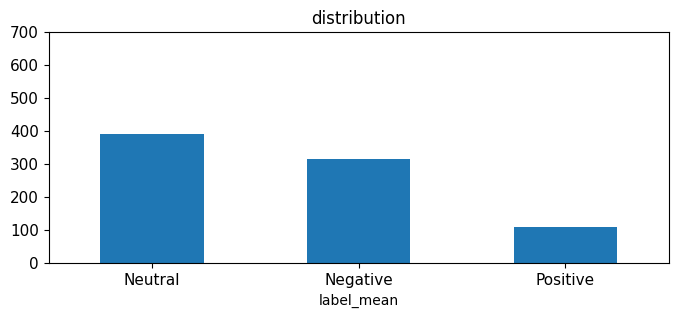

In [55]:
print(df_simplified.label_mean.value_counts())

# plot barchart for X
df_simplified.label_mean.value_counts().plot(kind = 'bar',
                                    title = 'distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label_mean
Neutral     54
Negative    39
Positive     7
Name: count, dtype: int64


<Axes: title={'center': 'distribution'}, xlabel='label_mean'>

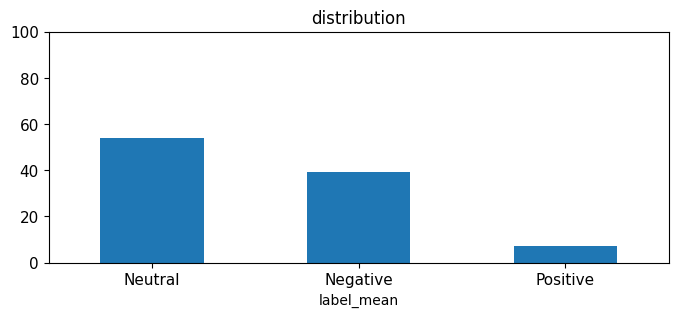

In [56]:
print(X_sample.label_mean.value_counts())

# plot barchart for X
X_sample.label_mean.value_counts().plot(kind = 'bar',
                                    title = 'distribution',
                                    ylim = [0, 100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='label_mean'>

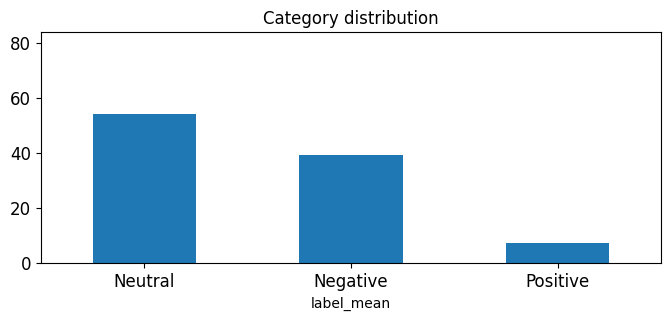

In [57]:
X_sample.label_mean.value_counts().plot(
    kind='bar',
    title='Category distribution',
    ylim=[0, X_sample.label_mean.value_counts().max() + 30],
    rot=0,
    fontsize=12,
    figsize=(8, 3)
)

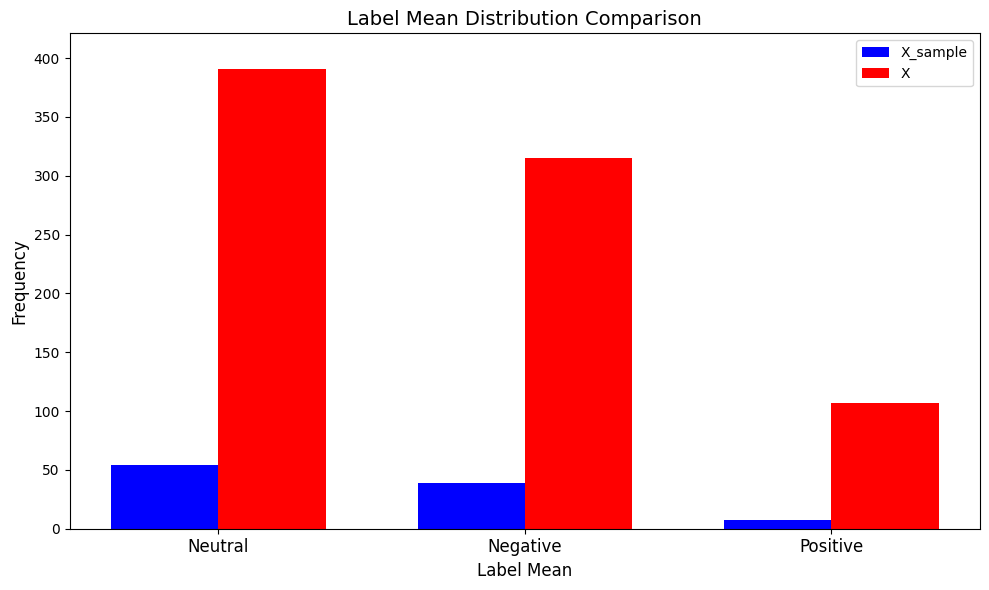

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 假設 df_simplified 和 X_sample 已經定義並且包含 'label_mean' 欄位
# 計算 X_sample 和 X 中 'label_mean' 欄位的計數
dataset1 = X_sample.label_mean.value_counts()
dataset2 = df_simplified.label_mean.value_counts()

# 設置柱狀圖的寬度
bar_width = 0.35
index = np.arange(len(dataset1))  # x軸的刻度位置

# 創建圖形
fig, ax = plt.subplots(figsize=(10, 6))

# 繪製 dataset1 (X_sample) 的分佈
ax.bar(index, dataset1, bar_width, label='X_sample', color='b')

# 繪製 dataset2 (df_simplified) 的分佈，並將其往右偏移一點
ax.bar(index + bar_width, dataset2, bar_width, label='X', color='r')

# 添加標題與標籤
ax.set_title('Label Mean Distribution Comparison', fontsize=14)
ax.set_xlabel('Label Mean', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 設置x軸的刻度位置和標籤
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dataset1.index, rotation=0, fontsize=12)

# 設置y軸範圍
ax.set_ylim([0, max(dataset1.max(), dataset2.max()) + 30])

# 添加圖例
ax.legend()

# 調整布局，防止文字重疊
plt.tight_layout()

# 顯示圖表
plt.show()


5.2 Feature Creation

In [59]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zzz31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zzz31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [60]:
df_simplified['unigrams'] = df_simplified['text'].apply(lambda x: dmh.tokenize_text(x))

In [61]:
df_simplified[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [62]:
df_simplified[0:4]

,text,label,label_mean,unigrams
0,Calls on retards,-1.0,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,Neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [63]:
list(df_simplified[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_simplified['text']) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [65]:
df_simplified['unigrams'][0]

['Calls', 'on', 'retards']

In [66]:
count_vect.get_feature_names_out()[689]

'calls'

In [67]:
analyze = count_vect.build_analyzer()

In [68]:
analyze(df_simplified['text'][0])

['calls', 'on', 'retards']

In [69]:
X_counts.shape

(813, 4313)

In [70]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [71]:
# we convert from sparse array to normal array
X_counts[-5:, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [72]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

i see the `1` at the last of the fifth record, let's find what it  represents ?

In [98]:
# Answer here
# 獲取第最後一條記錄（索引為812，因為長度為813，索引從0開始）來自 X_counts
last_record = X_counts[812]

# 獲取該記錄中值為 1 的索引（即在此記錄中出現的詞的索引）
indices = last_record.nonzero()[1]  # nonzero() 返回非零元素的行和列索引，這裡選擇列索引

# 使用索引從詞彙表中獲取對應的詞
#獲取第最後一條記錄第一筆非0數據
words = count_vect.get_feature_names_out()[indices[0]]
# words = count_vect.get_feature_names_out()[indices]

# 輸出對應的詞
print(words)

img


In [74]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [75]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df_simplified.index)[0:20]]

In [76]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

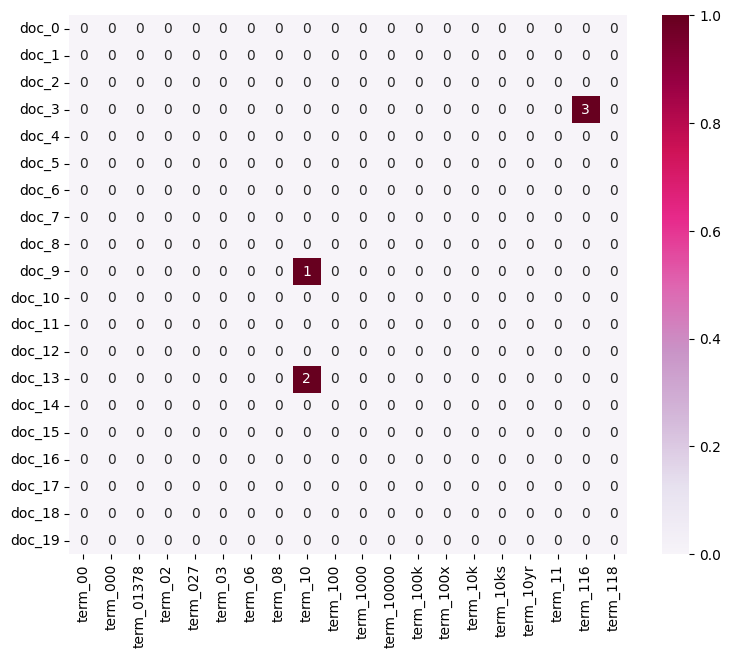

In [77]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

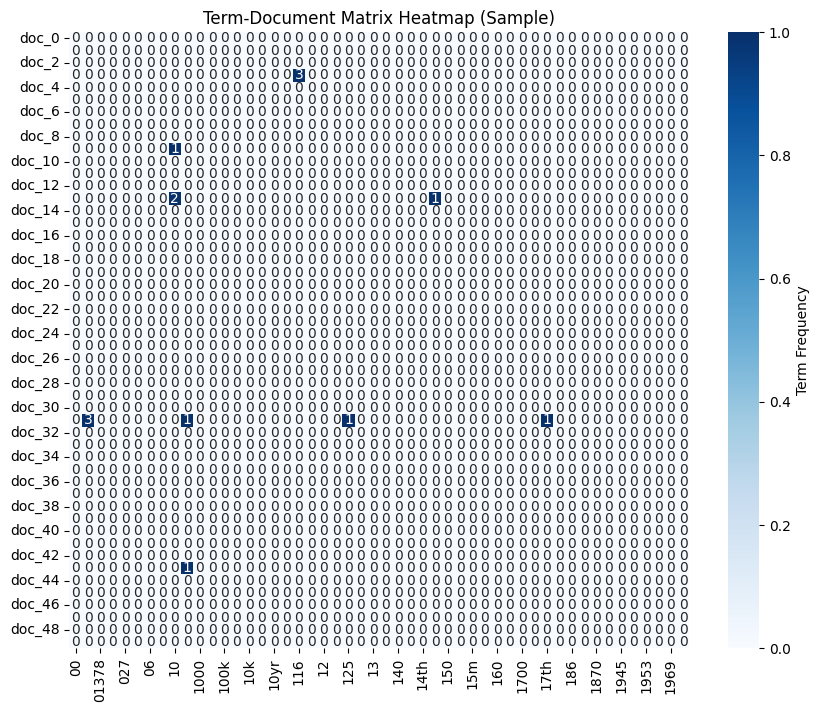

In [78]:
# Answer here
# X_counts 已經是詞項-文檔矩陣
# 將 X_counts 轉換為密集矩陣並取前 50 個詞和 50 個文檔
X_dense = X_counts.toarray()
df_todraw = pd.DataFrame(X_dense[:50, :50], columns=count_vect.get_feature_names_out()[:50], index=[f'doc_{i}' for i in range(50)])

# 設定畫圖的大小
plt.subplots(figsize=(10, 8))

# 使用 seaborn 畫熱力圖
ax = sns.heatmap(df_todraw,
                 cmap="Blues",   # 顏色映射
                 annot=True,     # 顯示每個格子的數值
                 vmin=0, vmax=1, # 設置顏色的範圍
                 cbar_kws={'label': 'Term Frequency'}) # 顯示顏色條的標籤

# 顯示圖表
plt.title('Term-Document Matrix Heatmap (Sample)')
plt.show()





In [79]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [80]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [81]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_66204\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

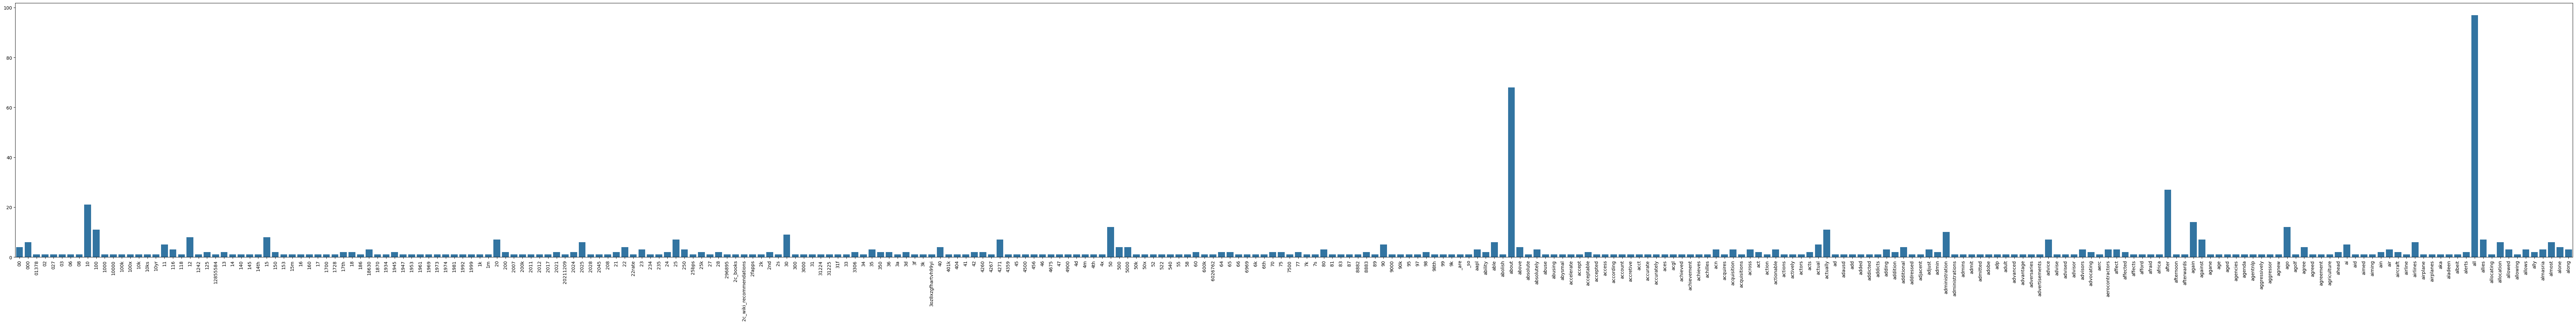

In [82]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [83]:
# Answer here
import plotly.express as px
import pandas as pd

# 假設 `term_frequencies` 和 `count_vect.get_feature_names_out()` 已經定義

# 創建一個 DataFrame 來進行繪圖
df_plot = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],  # 前300個詞
    'Frequency': term_frequencies[:300]               # 對應的詞頻
})

# 使用 Plotly 畫條形圖
fig = px.bar(df_plot, 
             x='Term', 
             y='Frequency', 
             title='Top 300 Most Frequent Terms', 
             labels={'Term': 'Words', 'Frequency': 'Frequency'},
             text='Frequency')  # 在條形上顯示頻率

# 調整 X 軸標籤的顯示角度
fig.update_xaxes(tickangle=90)

# 顯示圖表
fig.show()


In [84]:
# Answer here
import plotly.express as px
import pandas as pd
import numpy as np

# 假設 term_frequencies 和 count_vect 已經定義

# 計算每個詞的頻率
word_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# 選擇前 N 個最常見的詞
N = 50  # 假設我們只選擇前 50 個最常見的詞
top_n_indices = np.argsort(word_frequencies)[-N:]  # 找出前 N 個詞的索引
top_n_terms = count_vect.get_feature_names_out()[top_n_indices]
top_n_frequencies = word_frequencies[top_n_indices]

# 創建 DataFrame 進行可視化
df_top_n = pd.DataFrame({
    'Term': top_n_terms,
    'Frequency': top_n_frequencies
})

# 使用 Plotly 畫條形圖
fig = px.bar(df_top_n, 
             x='Term', 
             y='Frequency', 
             title=f'Top {N} Most Frequent Terms', 
             labels={'Term': 'Words', 'Frequency': 'Frequency'},
             text='Frequency')  # 在條形上顯示頻率

# 調整 X 軸標籤的顯示角度
fig.update_xaxes(tickangle=90)

# 顯示圖表
fig.show()


In [85]:
# Answer here
import plotly.express as px
import pandas as pd
import numpy as np

# 假設 term_frequencies 和 count_vect 已經定義

# 計算每個詞的頻率
word_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# 根據頻率排序詞彙
sorted_indices = np.argsort(word_frequencies)[::-1]  # 逆向排序，從高到低
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]
sorted_frequencies = word_frequencies[sorted_indices]

# 創建 DataFrame 來進行可視化
df_sorted = pd.DataFrame({
    'Term': sorted_terms[:300],  # 顯示前 300 個詞
    'Frequency': sorted_frequencies[:300]  # 對應的頻率
})

# 使用 Plotly 畫條形圖
fig = px.bar(df_sorted, 
             x='Term', 
             y='Frequency', 
             title='Top 300 Terms by Frequency', 
             labels={'Term': 'Words', 'Frequency': 'Frequency'},
             text='Frequency')  # 在條形上顯示頻率

# 調整 X 軸標籤的顯示角度
fig.update_xaxes(tickangle=90)

# 顯示圖表
fig.show()



In [86]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\zzz31\AppData\Local\Temp\ipykernel_66204\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



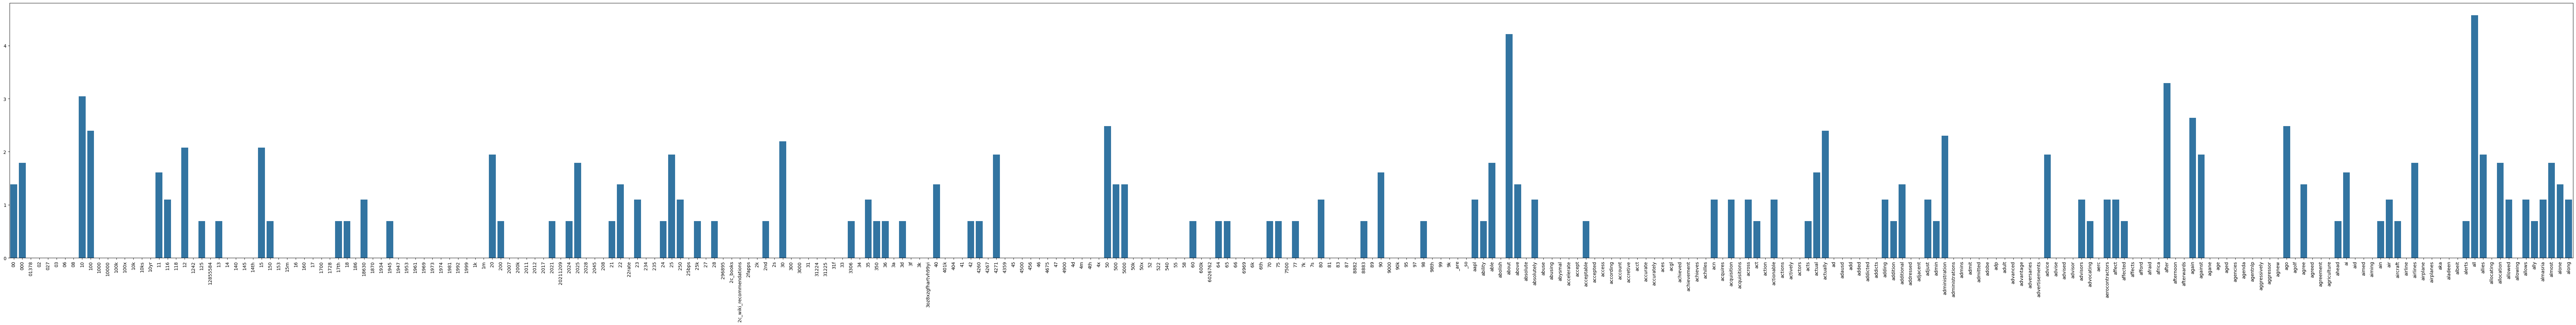

In [87]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\zzz31\AppData\Local\Temp\ipykernel_66204\67503655.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



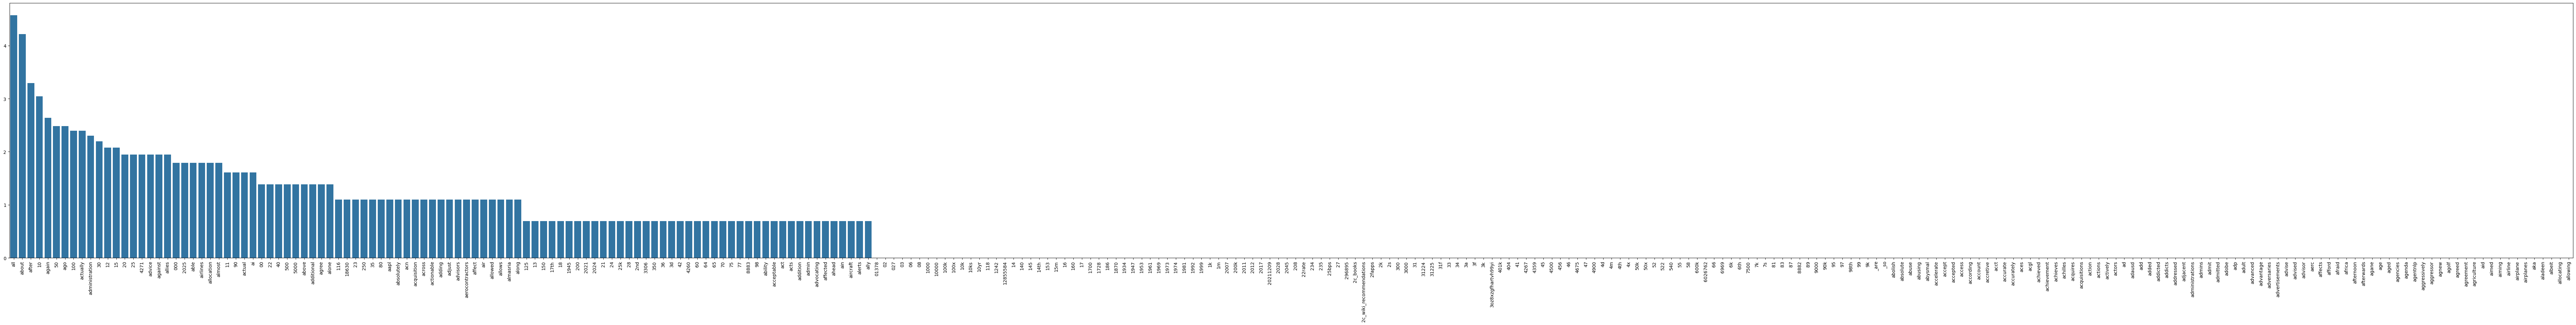

In [88]:
# Answer here
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 term_frequencies 是詞頻列表

# 對詞頻進行對數轉換
term_frequencies_log = [math.log(i) for i in term_frequencies if i > 0]  # 避免log(0) 的情況

# 排序詞頻
sorted_terms = sorted(zip(count_vect.get_feature_names_out()[:300], term_frequencies_log), key=lambda x: x[1], reverse=True)
sorted_terms, sorted_frequencies = zip(*sorted_terms)

# 繪製條形圖
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=sorted_terms, y=sorted_frequencies)
g.set_xticklabels(sorted_terms, rotation=90)
plt.show()


End of Phase 1(hw1)

# Phase 2

In [89]:
### Begin Assignment Here